In [5]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2


In [6]:
from soilgasflux_fcs import json_reader, models

/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
data_path = pathlib.Path('../data/synthetical/data62/test')
a = json_reader.Initializer(folderPath=data_path)
df = a.prepare_rawdata()
for i in df['id'].unique():
    df_i = df[df['id'] == i]


In [8]:
df_i.head()

,datetime,datetime_utc,k30_co2,bmp_pressure,bmp_temperature,si_humidity,si_temperature,id,timedelta,alpha,c_s,c_c0,deadband,disturbance_intensity,disturbance_starting_point,add_noise
0,2024-11-20 00:20:47,2024-11-20 00:20:47,429.853571,99000.0,20.0,70.0,20.0,2024-11-20_0-20-47,0,0.0017,1000.0,430,30,-5,30,True
1,2024-11-20 00:20:48,2024-11-20 00:20:48,429.952012,99000.0,20.0,70.0,20.0,2024-11-20_0-20-47,1,0.0017,1000.0,430,30,-5,30,True
2,2024-11-20 00:20:49,2024-11-20 00:20:49,429.376548,99000.0,20.0,70.0,20.0,2024-11-20_0-20-47,2,0.0017,1000.0,430,30,-5,30,True
3,2024-11-20 00:20:50,2024-11-20 00:20:50,428.133856,99000.0,20.0,70.0,20.0,2024-11-20_0-20-47,3,0.0017,1000.0,430,30,-5,30,True
4,2024-11-20 00:20:51,2024-11-20 00:20:51,429.039362,99000.0,20.0,70.0,20.0,2024-11-20_0-20-47,4,0.0017,1000.0,430,30,-5,30,True


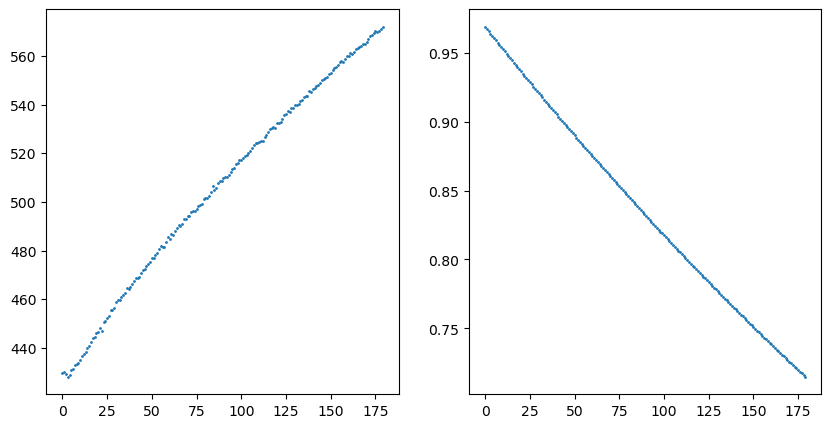

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(df_i['timedelta'], df_i['k30_co2'], s=1)

a = models.hm_model_dcdt(t0=0, c0=df_i['c_c0'], a=df_i['alpha'], cx=df_i['c_s'], t=df_i['timedelta'])
ax[1].scatter(df_i['timedelta'], a, s=1)

In [10]:
from soilgasflux_fcs import synthetic_postProcessing

In [11]:
a = synthetic_postProcessing.Synthetic(processed_data='./output/test_2024-11-20.nc',
                                   raw_dataFolder='../data/synthetical/data62/test')
expected_results = a.get_expectedResults()

Synthetic initialized


/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [12]:
expected_results

<xarray.Dataset> Size: 2kB
Dimensions:       (time: 11, cutoff: 16)
Coordinates:
  * time          (time) datetime64[ns] 88B 2024-11-20T00:20:37 ... 2024-11-2...
  * cutoff        (cutoff) int64 128B 20 30 40 50 60 70 ... 130 140 150 160 170
Data variables:
    dcdt(HM)      (time, cutoff) float64 1kB 0.8833 0.8693 ... 0.7382 0.7258
    deadband      (time) int64 88B 30 30 30 30 30 30 30 30 30 30 30
    d_intensity   (time) int64 88B -20 -5 -10 -20 -5 -10 -20 -5 -10 -20 -5
    d_startpoint  (time) int64 88B 30 30 30 30 30 30 30 30 30 30 30
    add_noise     (time) bool 11B True True True True ... True True True True

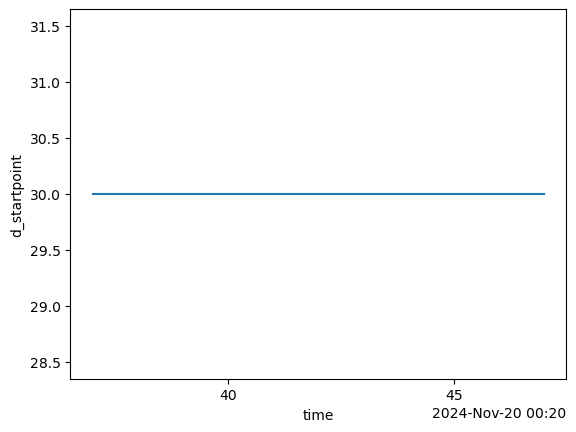

In [14]:
expected_results['d_startpoint'].plot()

/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_62328/1995672831.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_62328/1995672831.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_62328/1995672831.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykernel_62328/1995672831.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/3c/hcr1f3154x1g591jwk643gyc0000gn/T/ipykern

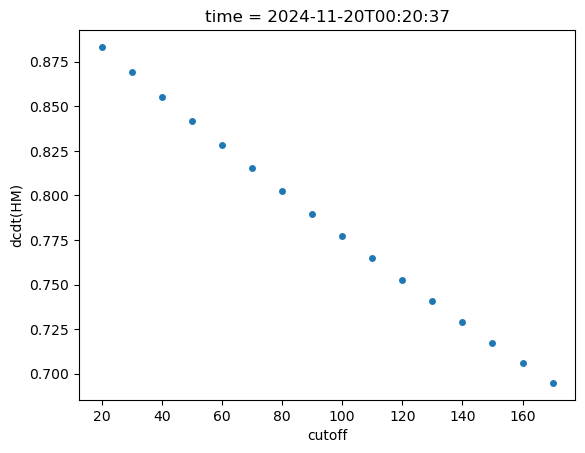

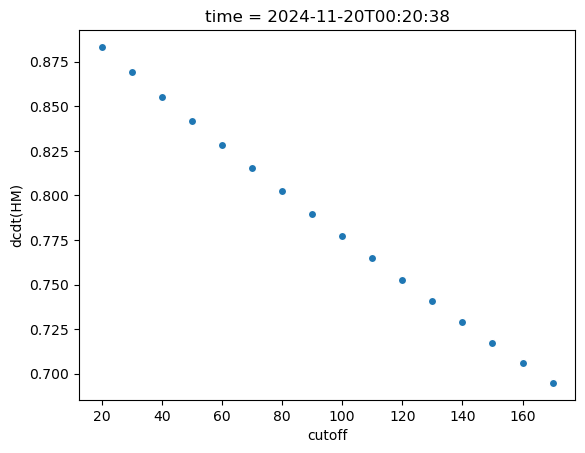

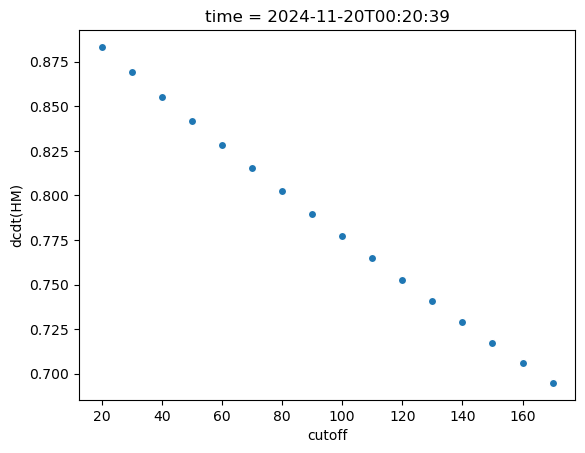

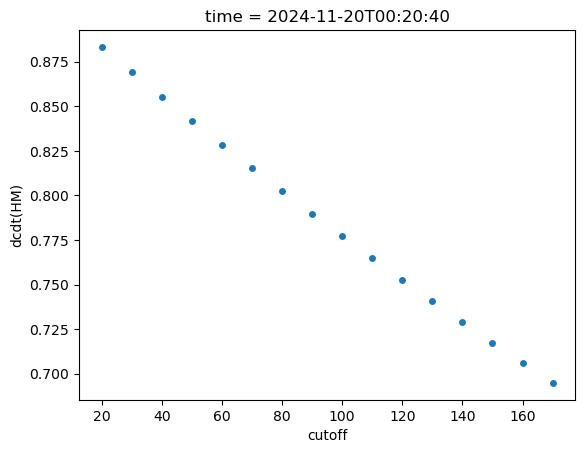

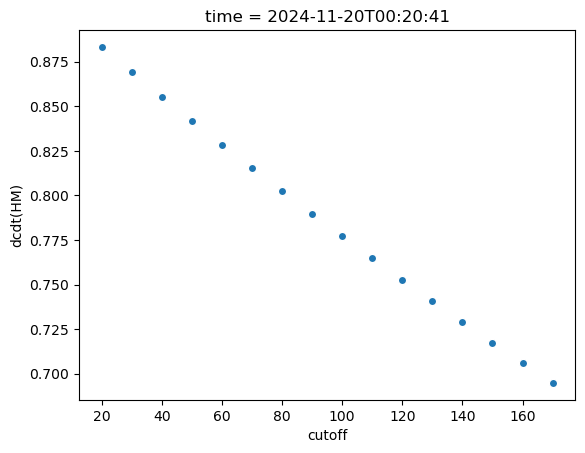

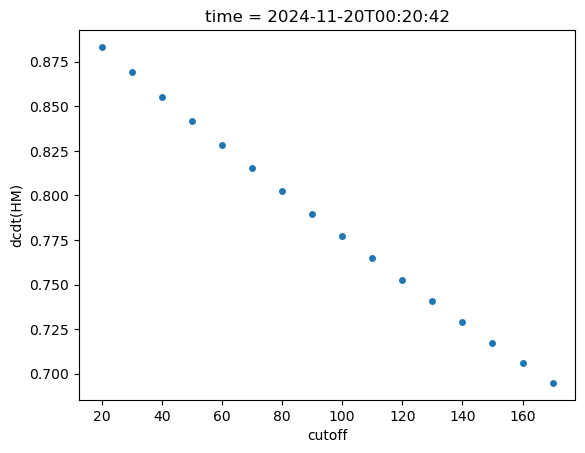

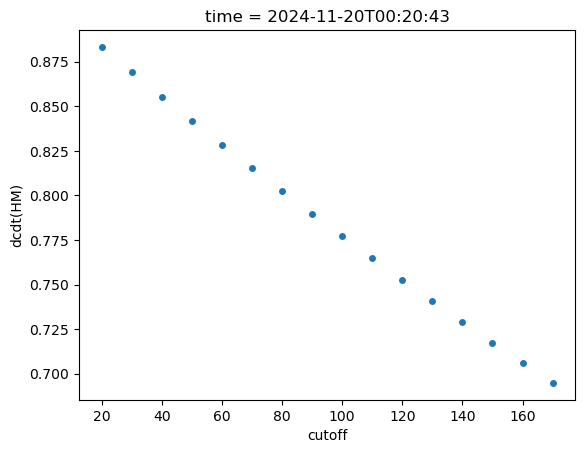

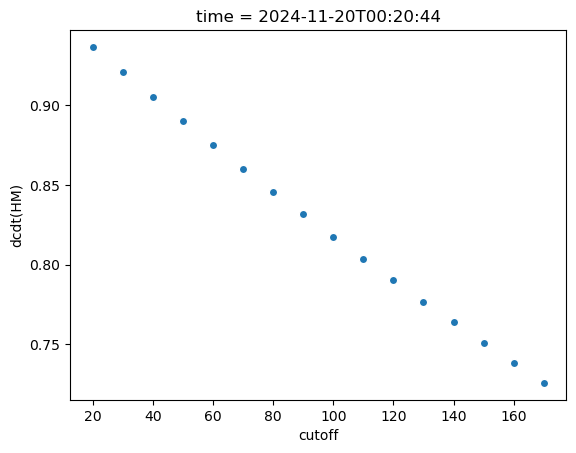

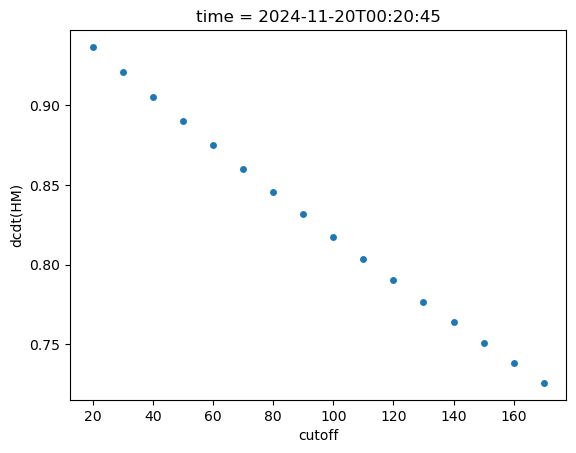

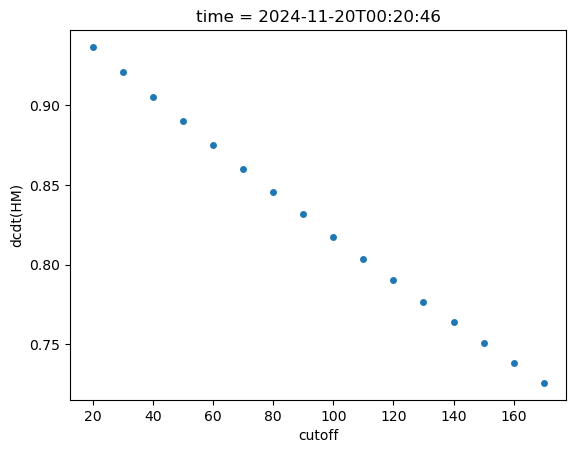

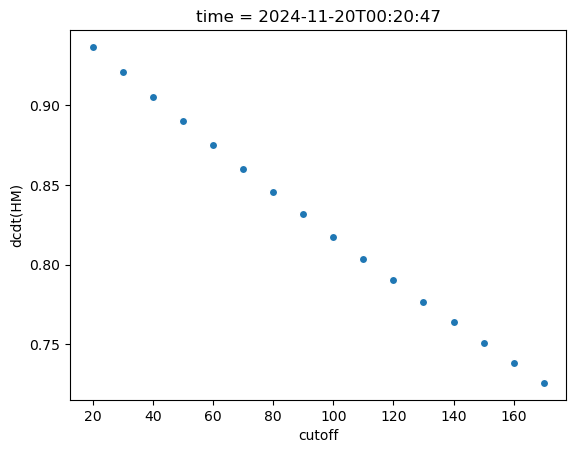

In [85]:
for t in expected_results.time.values:
    fig, ax = plt.subplots(1)
    expected_results.sel(time=t).plot.scatter(x='cutoff', y='dcdt(HM)', ax=ax)
    fig.show()
